# Load libraries

In [1]:
library(docstring) ##documentation of R functions
library(ggplot2) ##pretty plots in R
library(cowplot) ##easy pretty ggplot figures
library(ggpubr) ##cowplot wrapper
library(dplyr) ##rearranging df
library(tidyr) ##rearranging df
library(gridExtra) ## plotting mutliple figures on one plot
library(RColorBrewer) ##selecting colours from palettes
library(extrafont) ##fonts for plots
library(ComplexUpset) ## generate upset plots
library(purrr)
library(stringr) ## for using string_detect
library(scales)
library(UpSetR)
library(epitools)     ## OR and RR calculations


Attaching package: ‘docstring’


The following object is masked from ‘package:utils’:

    ?



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registering fonts with R


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard



Attaching package: ‘UpSetR’


The following object is masked from ‘package:ComplexUpset’:

    upset




# Summary of overlaps with enhancer databases

## Human

### UpSet Plot

In [2]:
hg38_bidir_overlaps <- read.table('/scratch/Users/rusi2317/e_and_o/archive/venn_bidirs_hg38_8599031.out',
                             sep='\t', header=T)
hg38_bidir_overlaps

combinations,count
<fct>,<int>
dbNascent,36325
EnhancerAtlas,44081
FANTOM5,914
ENCODE,60790
dbNascent&EnhancerAtlas,334148
dbNascent&FANTOM5,338
dbNascent&ENCODE,29326
EnhancerAtlas&FANTOM5,14507
FANTOM5&ENCODE,1683


In [3]:
hg38_bidirInput <- hg38_bidir_overlaps$count
names(hg38_bidirInput) <- hg38_bidir_overlaps$combinations
hg38_bidirInput

dbNascent                          EnhancerAtlas 
                                 36325                                  44081 
                               FANTOM5                                 ENCODE 
                                   914                                  60790 
               dbNascent&EnhancerAtlas                      dbNascent&FANTOM5 
                                334148                                    338 
                      dbNascent&ENCODE                  EnhancerAtlas&FANTOM5 
                                 29326                                  14507 
                        FANTOM5&ENCODE                   EnhancerAtlas&ENCODE 
                                  1683                                  19774 
       dbNascent&EnhancerAtlas&FANTOM5           EnhancerAtlas&FANTOM5&ENCODE 
                                  4112                                    498 
              dbNascent&FANTOM5&ENCODE         dbNascent&EnhancerAtlas&ENCODE 
                                  2862                                 217825 
dbNascent&EnhancerAtlas&FANTOM5&ENCODE 
                                 27345

In [4]:
enhancers <- c("dbNascent","EnhancerAtlas","FANTOM5","ENCODE")

In [5]:
hg38_subsets <- hg38_bidir_overlaps$combination
## Check if each subset mentions each symptom or not
hg38_enhancer_mat <- map_dfc(hg38_subsets, str_detect, enhancers) %>%
    data.frame() %>%
    t() %>% # transpose the result, ugh
    as_tibble()
colnames(hg38_enhancer_mat)  <- enhancers
hg38_enhancer_mat$count <- hg38_bidir_overlaps$count
hg38_enhancer_mat %>% print(n = nrow(hg38_enhancer_mat))

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


# A tibble: 15 × 5
   dbNascent EnhancerAtlas FANTOM5 ENCODE  count
   <lgl>     <lgl>         <lgl>   <lgl>   <int>
 1 TRUE      FALSE         FALSE   FALSE   36325
 2 FALSE     TRUE          FALSE   FALSE   44081
 3 FALSE     FALSE         TRUE    FALSE     914
 4 FALSE     FALSE         FALSE   TRUE    60790
 5 TRUE      TRUE          FALSE   FALSE  334148
 6 TRUE      FALSE         TRUE    FALSE     338
 7 TRUE      FALSE         FALSE   TRUE    29326
 8 FALSE     TRUE          TRUE    FALSE   14507
 9 FALSE     FALSE         TRUE    TRUE     1683
10 FALSE     TRUE          FALSE   TRUE    19774
11 TRUE      TRUE          TRUE    FALSE    4112
12 FALSE     TRUE          TRUE    TRUE      498
13 TRUE      FALSE         TRUE    TRUE     2862
14 TRUE      TRUE          FALSE   TRUE   217825
15 TRUE      TRUE          TRUE    TRUE    27345


In [6]:
hg38_indvs <- hg38_enhancer_mat %>%
    uncount(count) 
colnames(hg38_indvs) <- c('dbNascent','EnhancerAtlas', 'FANTOM5','ENCODE')
hg38_indvs

dbNascent,EnhancerAtlas,FANTOM5,ENCODE
<lgl>,<lgl>,<lgl>,<lgl>
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE


In [7]:
enhancers2 <- c('dbNascent','EnhancerAtlas', 'FANTOM5','ENCODE')

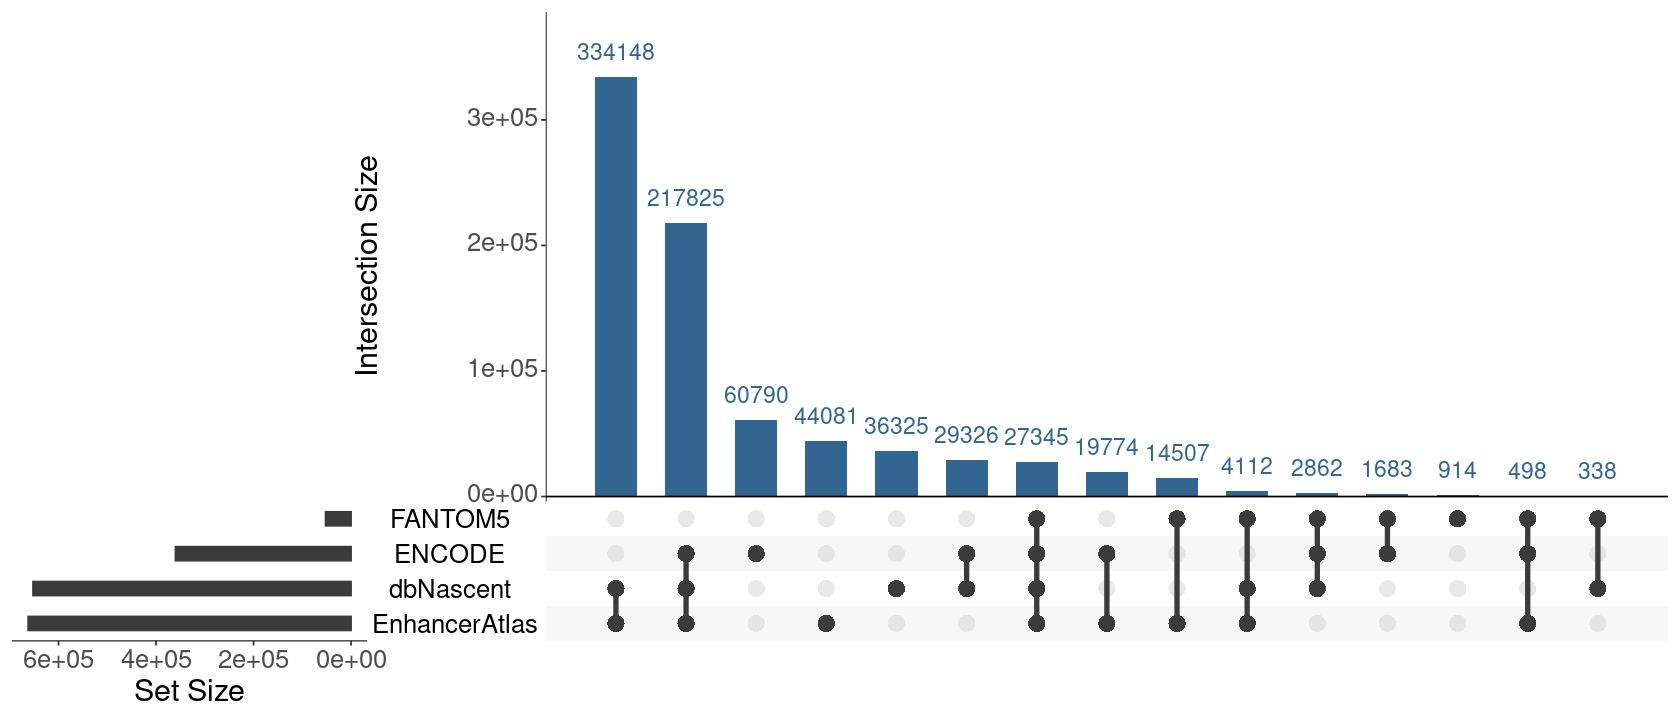

In [9]:
options(repr.plot.width=14, repr.plot.height=6)

UpSetR::upset(fromExpression(hg38_bidirInput), 
      main.bar.color = "#336591ff",
      order.by = "freq",
      point.size = 4.5,
      line.size = 1.5 ,
     text.scale = 2.2,
      set_size.show = FALSE)

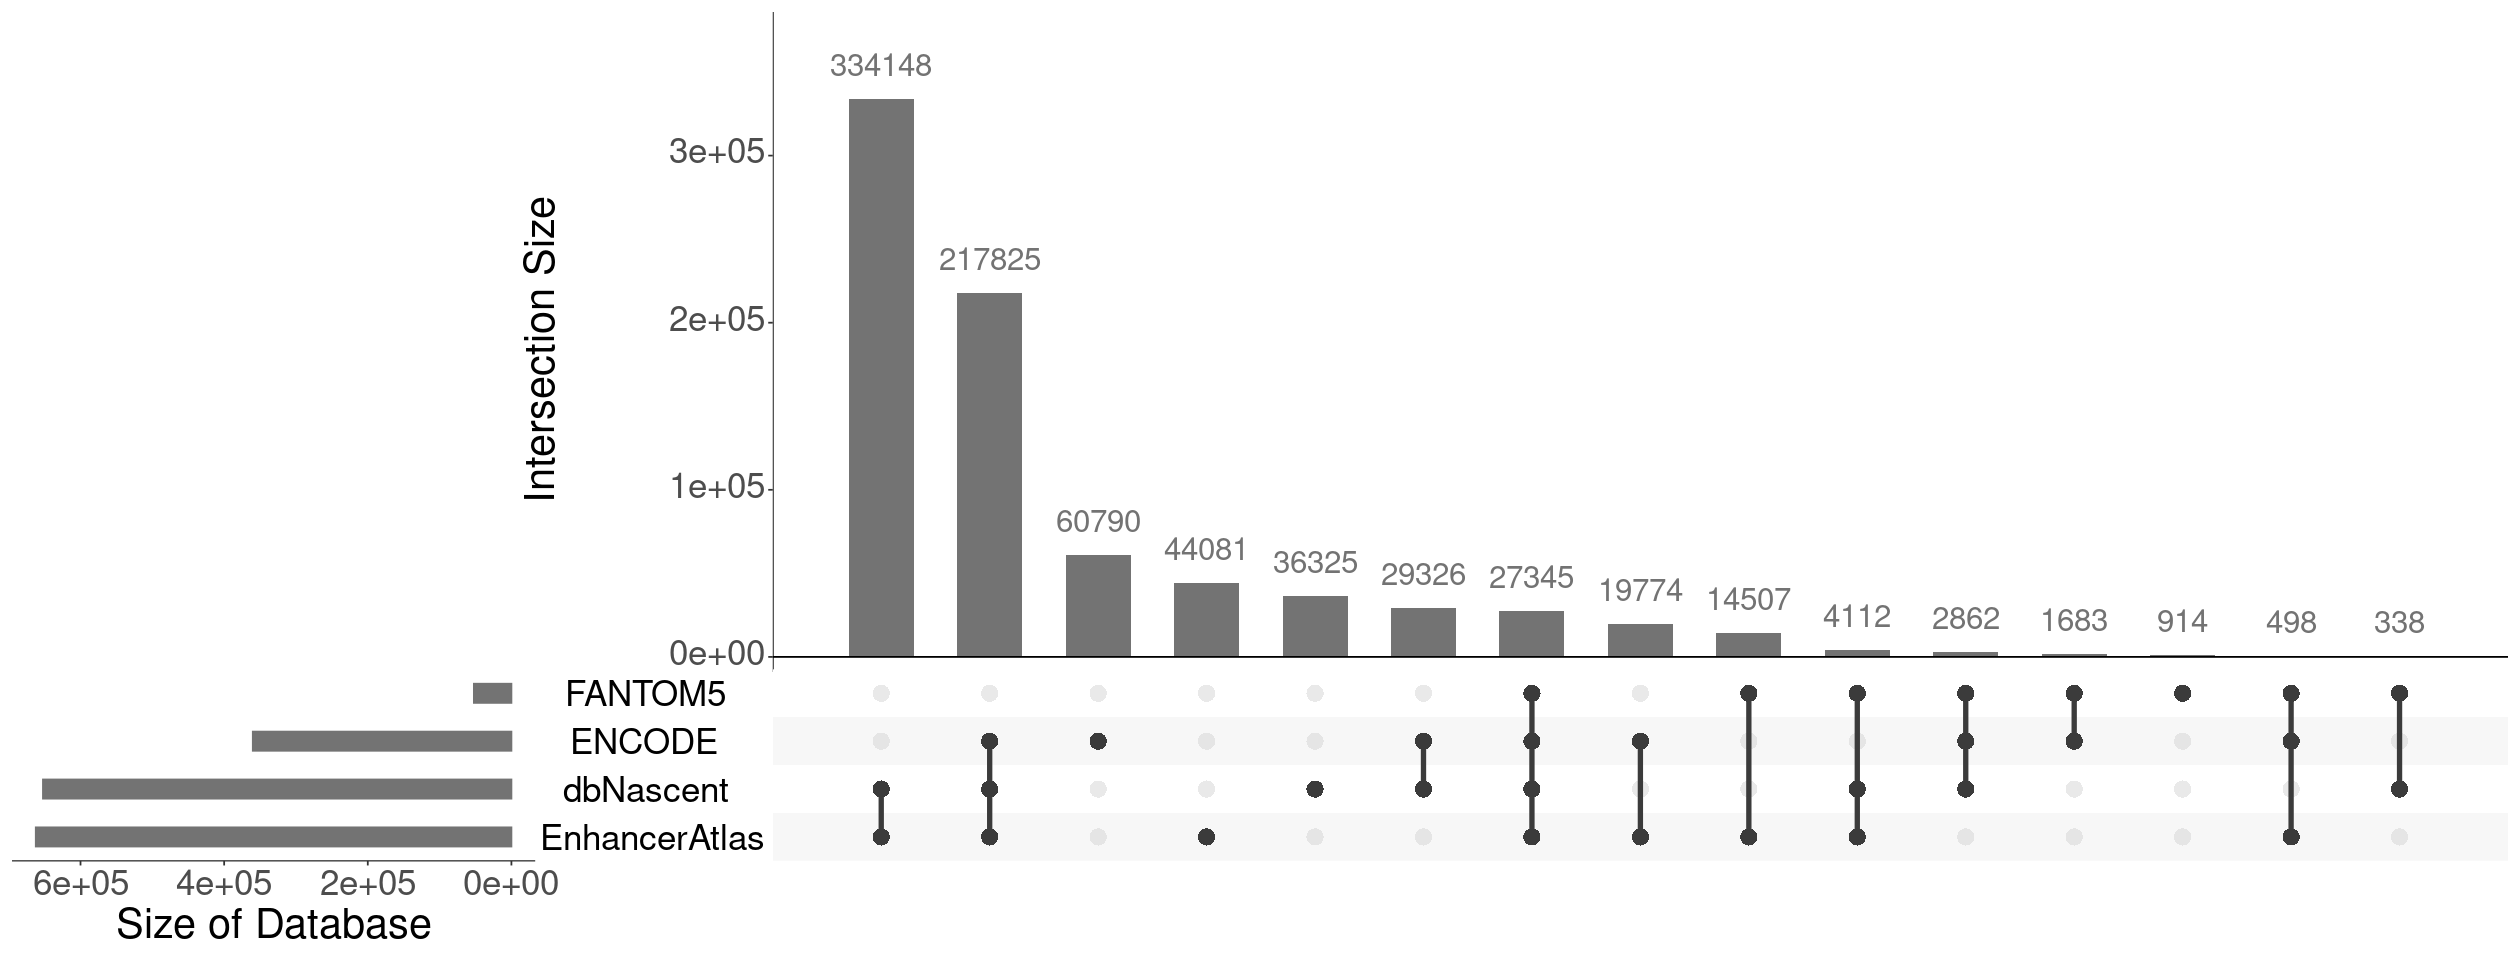

In [10]:
options(repr.plot.width=21, repr.plot.height=8)

hu <- UpSetR::upset(fromExpression(hg38_bidirInput), 
              main.bar.color = "gray45",
              sets.bar.color = "gray45",
              order.by = "freq",
              point.size = 4.5,
              line.size = 1.5 ,
              text.scale = 3,
              mainbar.y.label = "Intersection Size", 
              sets.x.label = "Size of Database",
              set_size.show = FALSE)
hu

In [11]:
pdf(file="/Users/rusi2317/projects/DBNascent_Analysis/figures/hg38_enhancer_db_overlaps.pdf", 
    width = 21,
    height = 8) 
hu
dev.off()

png 
  2

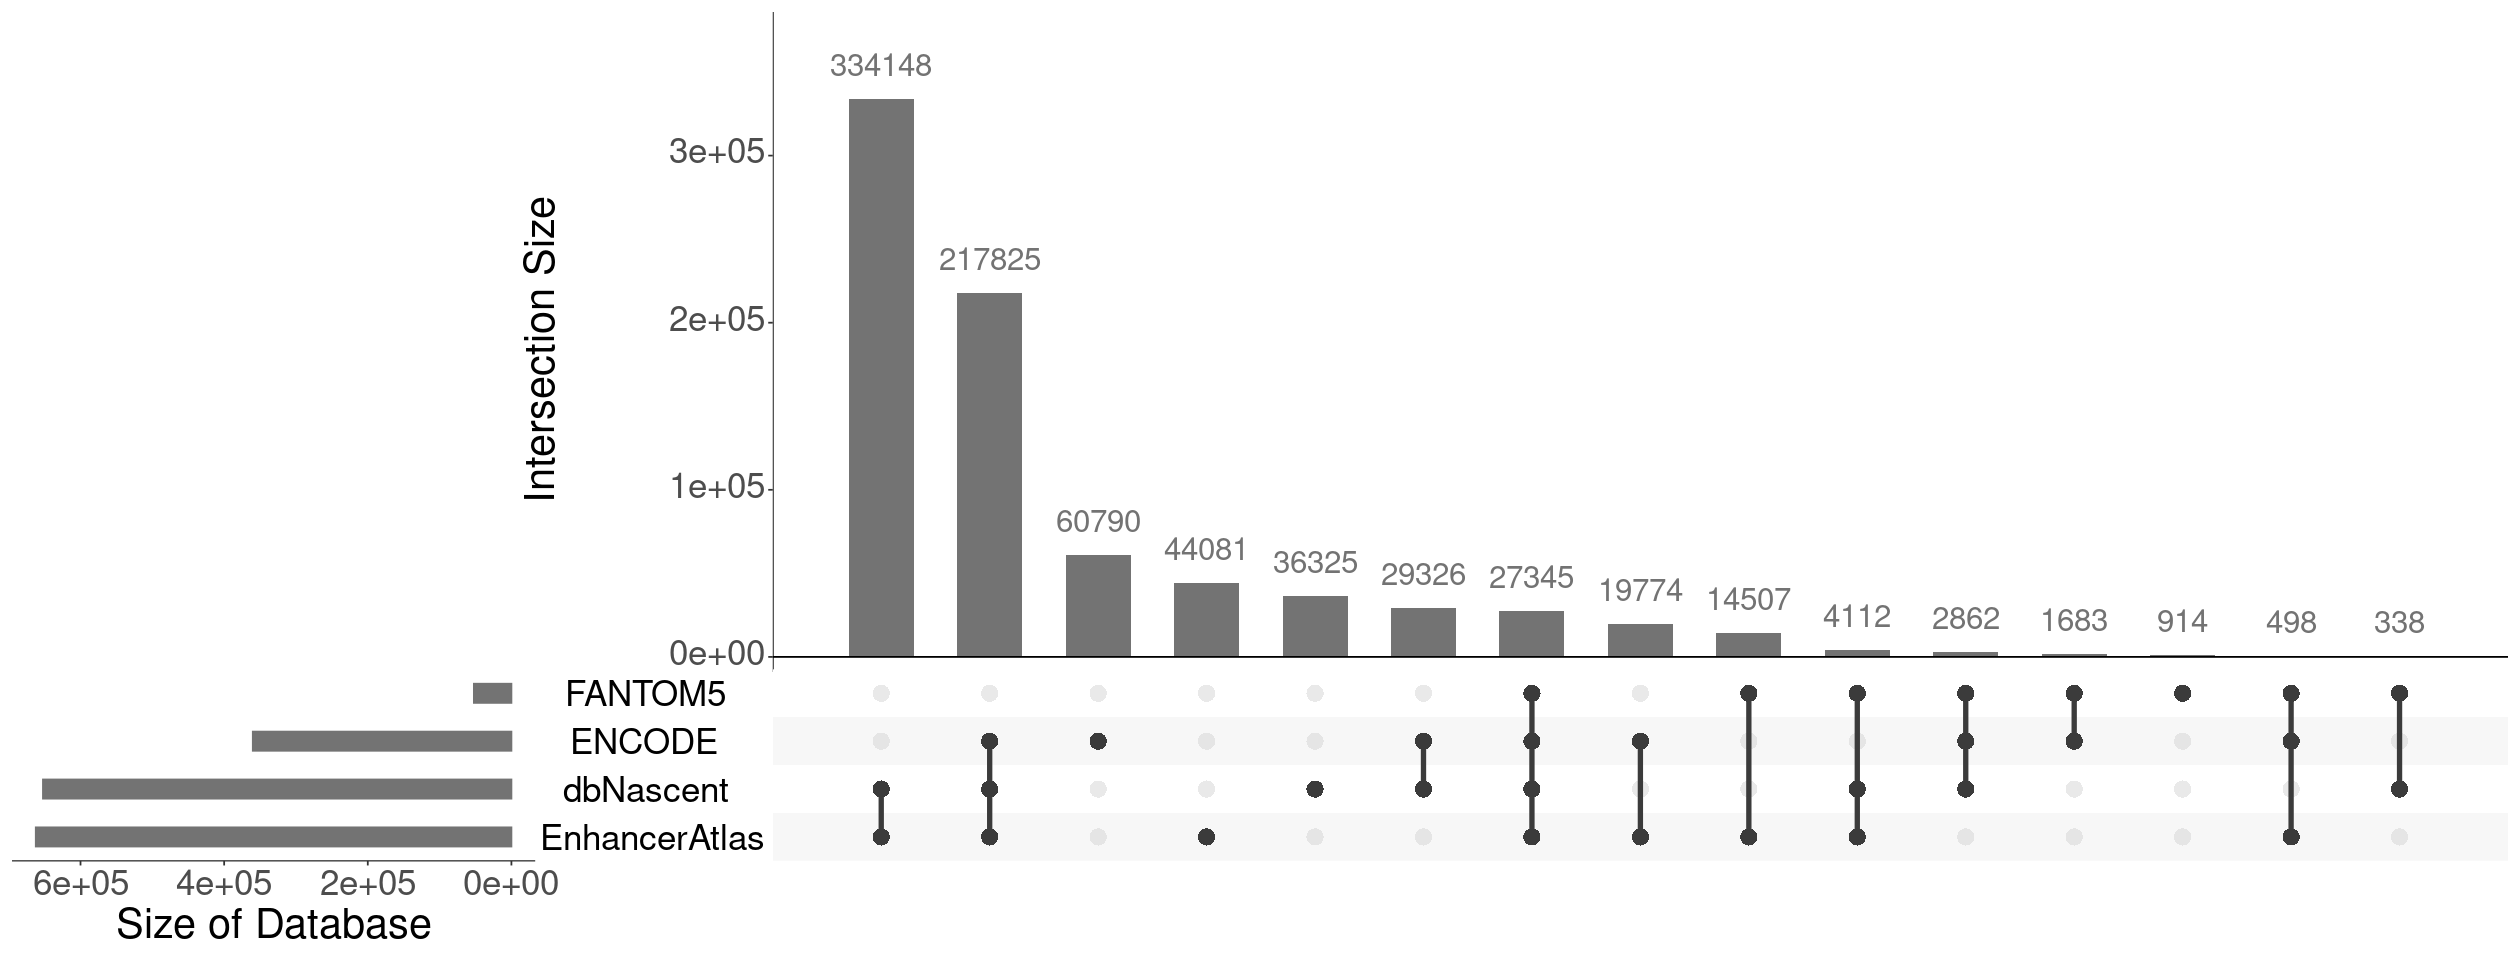

In [12]:
hu2 <- UpSetR::upset(fromExpression(hg38_bidirInput), 
                     main.bar.color = "gray45",
                     sets.bar.color = "gray45",
                     order.by = "freq",
                     point.size = 4.5,
                     line.size = 1.5 ,
                     text.scale = 3,
                     mainbar.y.label = "Intersection Size", 
                     sets.x.label = "Size of Database",
                     set_size.show = FALSE)
hu2

### Overlap percent plot

In [13]:
hg38_reg_database <- c('FANTOM5','ENCODE','Enhancer Atlas')
hg38_total_reg <- c(63285, 926535, 192173)
hg38_overlap_reg <- c(36463, 418443, 127507)

hg38_summary_overlaps <- as.data.frame(hg38_reg_database)
hg38_summary_overlaps$total_reg <- hg38_total_reg
hg38_summary_overlaps$overlap_reg <- hg38_overlap_reg
hg38_summary_overlaps$percent_overlap <- (hg38_summary_overlaps$overlap_reg/hg38_summary_overlaps$total_reg)*100
hg38_summary_overlaps$reg_database <- factor(hg38_summary_overlaps$hg38_reg_database,
                                        levels=c('ENCODE','FANTOM5','Enhancer Atlas'))
hg38_summary_overlaps

hg38_reg_database,total_reg,overlap_reg,percent_overlap,reg_database
<fct>,<dbl>,<dbl>,<dbl>,<fct>
FANTOM5,63285,36463,57.61713,FANTOM5
ENCODE,926535,418443,45.16214,ENCODE
Enhancer Atlas,192173,127507,66.35011,Enhancer Atlas


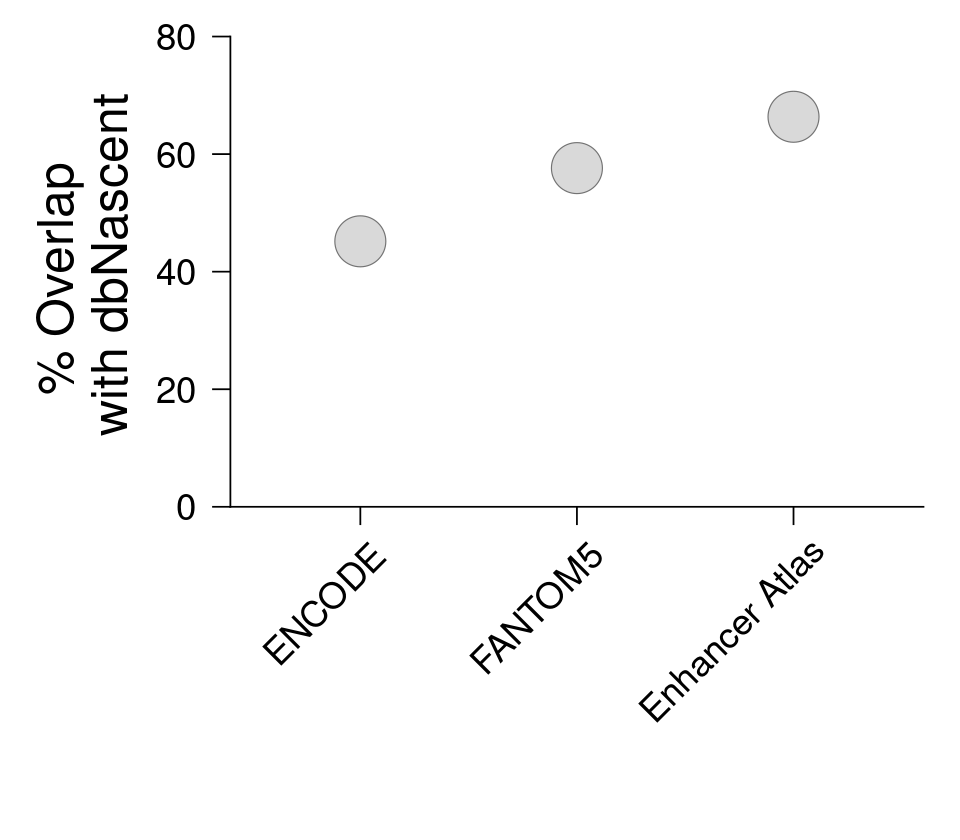

In [16]:
options(repr.plot.width=8, repr.plot.height=7)

h1 <- ggplot(hg38_summary_overlaps, aes(x=reg_database, y=percent_overlap)) +
  geom_point(size=14, 
             color="gray45",
             fill="gray85", 
             shape=21) +
ylab('% Overlap \n with dbNascent') + xlab(' ') +
theme_cowplot(44) +
theme(plot.title = element_text(size = 35, hjust = 0.5, face='bold'),
                  axis.title = element_text(size = 30), 
                  axis.text.x = element_text(size = 22, 
                                             angle=45, 
                                             vjust=0.95,
                                             hjust=0.91),
                  axis.text = element_text(size = 22)) +
scale_y_continuous(limits = c(0,80), expand = c(0, 0))  +            
theme(panel.background = element_rect(fill = "transparent"), 
      plot.background = element_rect(fill = "transparent", color = NA),
      legend.key = element_rect(colour = "transparent", fill = "transparent"),
      legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent"))

h1

In [17]:
ggsave(h1, width = 8, height = 6,
       filename = "/Users/rusi2317/projects/DBNascent_Analysis/figures/hg38_db_overlap_with_dbnascent.pdf", 
       bg = "transparent")


## Mouse

### UpSet Plot

In [19]:
mm10_bidir_overlaps <- read.table('/scratch/Users/rusi2317/e_and_o/archive/venn_bidirs_mm10_8599027.out',
                             sep='\t', header=T)
mm10_bidir_overlaps

combinations,count
<fct>,<int>
dbNascent,37856
EnhancerAtlas,302673
FANTOM5,703
ENCODE,14011
dbNascent&EnhancerAtlas,371686
dbNascent&FANTOM5,518
dbNascent&ENCODE,7255
EnhancerAtlas&FANTOM5,10986
FANTOM5&ENCODE,377


In [20]:
mm10_bidirInput <- mm10_bidir_overlaps$count
names(mm10_bidirInput) <- mm10_bidir_overlaps$combinations
mm10_bidirInput

dbNascent                          EnhancerAtlas 
                                 37856                                 302673 
                               FANTOM5                                 ENCODE 
                                   703                                  14011 
               dbNascent&EnhancerAtlas                      dbNascent&FANTOM5 
                                371686                                    518 
                      dbNascent&ENCODE                  EnhancerAtlas&FANTOM5 
                                  7255                                  10986 
                        FANTOM5&ENCODE                   EnhancerAtlas&ENCODE 
                                   377                                   8429 
       dbNascent&EnhancerAtlas&FANTOM5           EnhancerAtlas&FANTOM5&ENCODE 
                                  8880                                    281 
              dbNascent&FANTOM5&ENCODE         dbNascent&EnhancerAtlas&ENCODE 
                                   774                                 115633 
dbNascent&EnhancerAtlas&FANTOM5&ENCODE 
                                 20506

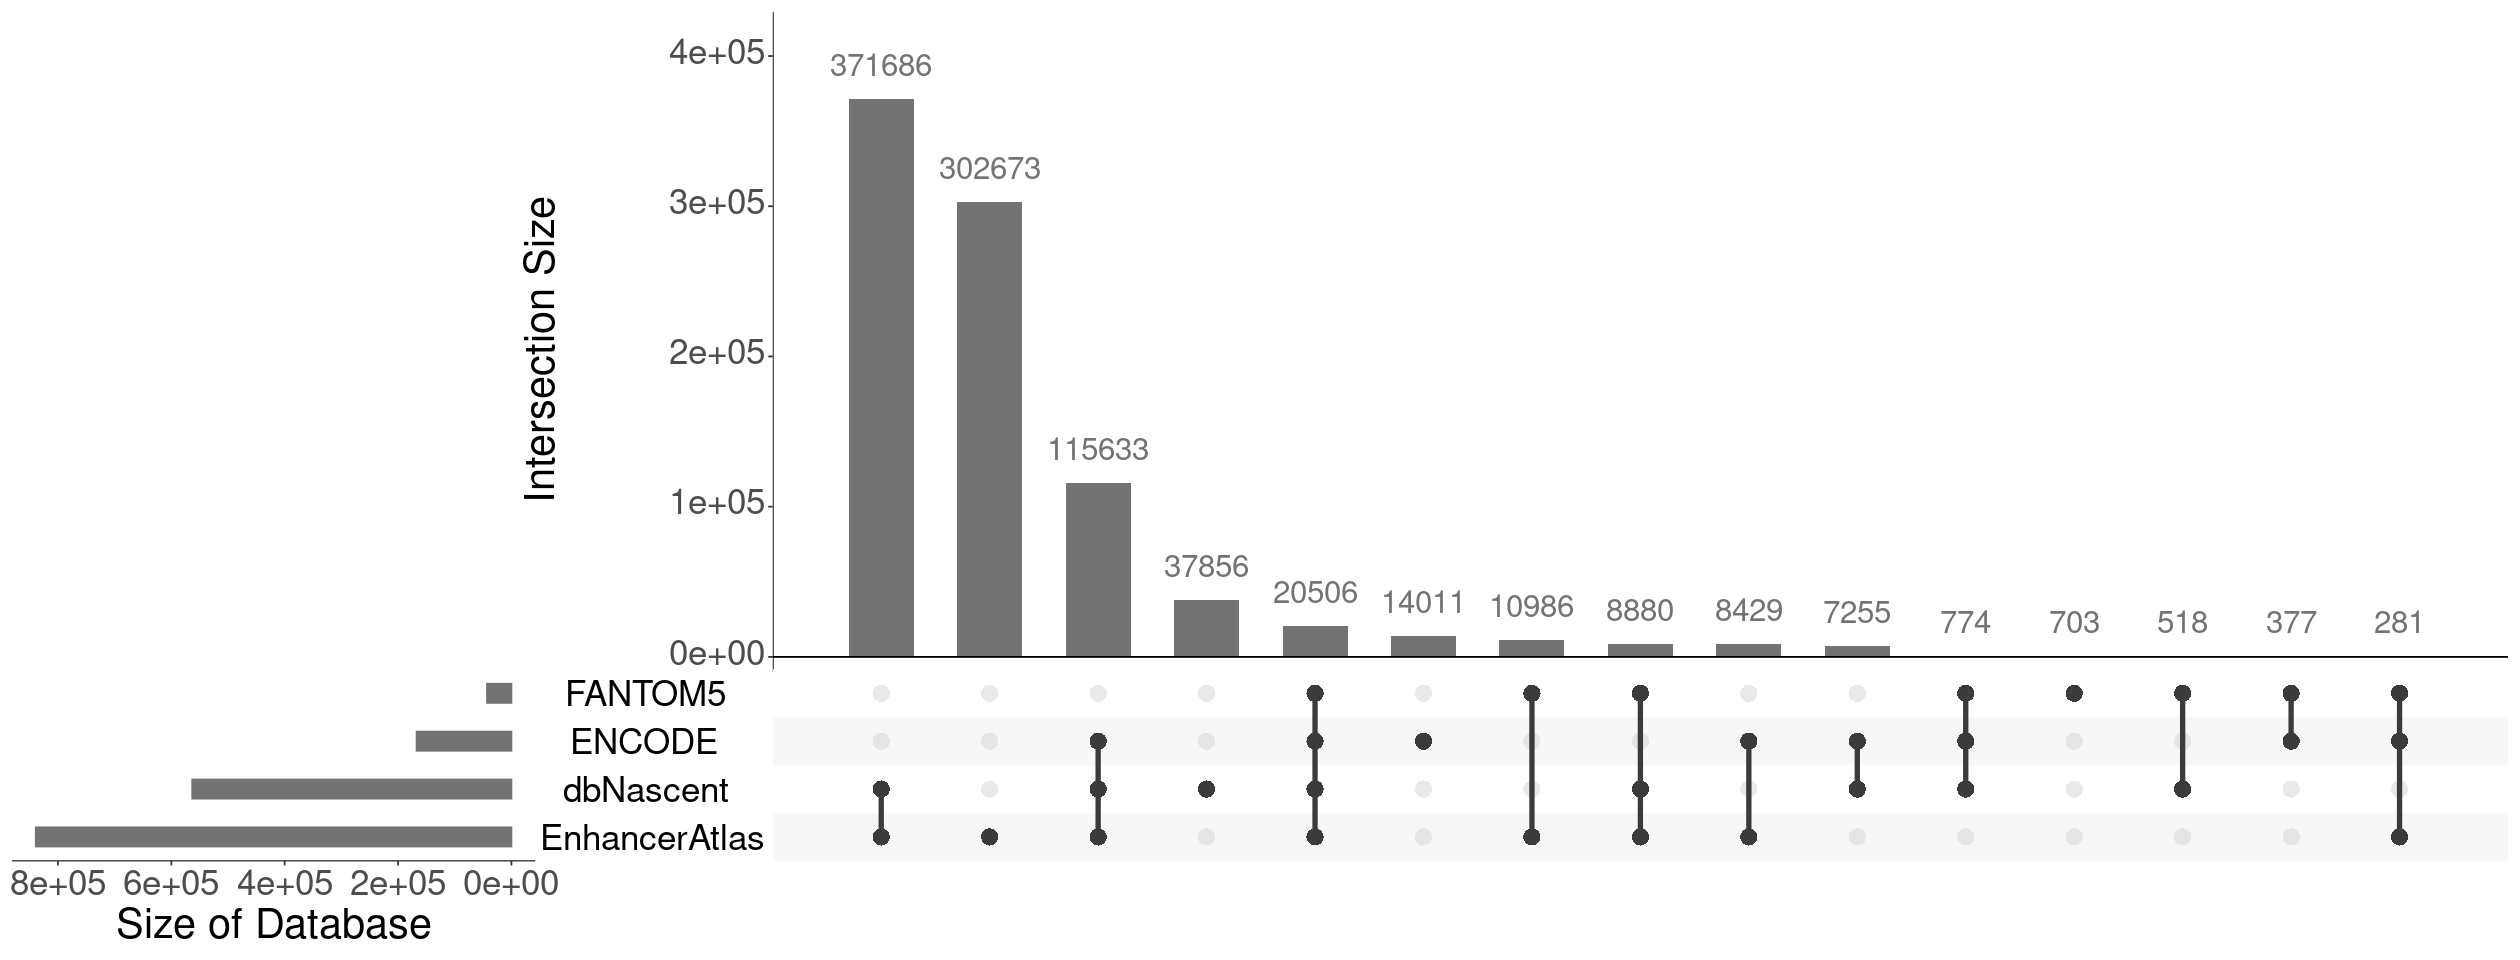

In [22]:
options(repr.plot.width=21, repr.plot.height=8)

mu <- UpSetR::upset(fromExpression(mm10_bidirInput), 
              main.bar.color = "gray45",
              sets.bar.color = "gray45",
              order.by = "freq",
              point.size = 4.5,
              line.size = 1.5 ,
              text.scale = 3,
              mainbar.y.label = "Intersection Size", 
              sets.x.label = "Size of Database",
              set_size.show = FALSE) 

mu

In [23]:
pdf(file="/Users/rusi2317/projects/DBNascent_Analysis/figures/mm10_enhancer_db_overlaps.pdf", 
    width = 21,
    height = 8) 
mu
dev.off()

png 
  2

### Overlap percent plot

In [18]:
mm10_reg_database <- c('FANTOM5','ENCODE','Enhancer Atlas')
mm10_total_reg <- c(49797, 343731, 519730)
mm10_overlap_reg <- c(32361, 204818, 207131)

mm10_summary_overlaps <- as.data.frame(mm10_reg_database)
mm10_summary_overlaps$total_reg <- mm10_total_reg
mm10_summary_overlaps$overlap_reg <- mm10_overlap_reg
mm10_summary_overlaps$percent_overlap <- (mm10_summary_overlaps$overlap_reg/mm10_summary_overlaps$total_reg)*100
mm10_summary_overlaps$reg_database <- factor(mm10_summary_overlaps$mm10_reg_database,
                                        levels=c('ENCODE','FANTOM5','Enhancer Atlas'))
mm10_summary_overlaps

mm10_reg_database,total_reg,overlap_reg,percent_overlap,reg_database
<fct>,<dbl>,<dbl>,<dbl>,<fct>
FANTOM5,49797,32361,64.98584,FANTOM5
ENCODE,343731,204818,59.58671,ENCODE
Enhancer Atlas,519730,207131,39.85358,Enhancer Atlas


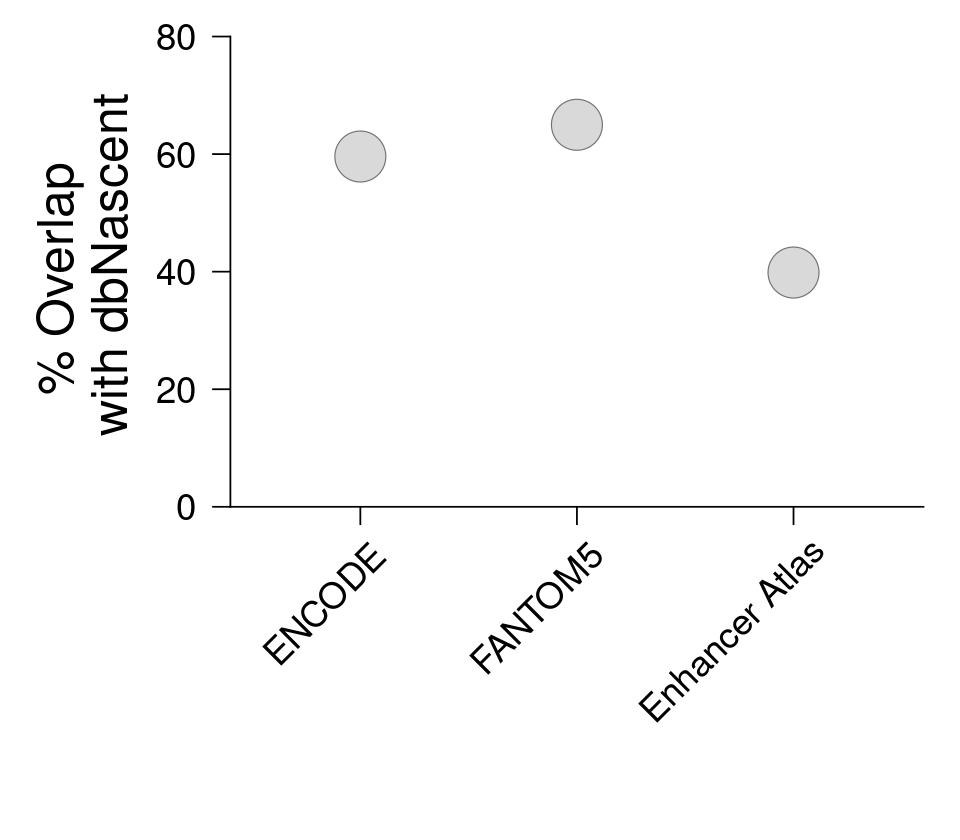

In [20]:
options(repr.palot.width=8, repr.plot.height=7)

m1 <- ggplot(mm10_summary_overlaps, aes(x=reg_database, y=percent_overlap)) +
  geom_point(size=14, 
             color="gray45",
             fill="gray85", 
             shape=21) +
ylab('% Overlap \n with dbNascent') + xlab(' ') +
theme_cowplot(44) +
theme(plot.title = element_text(size = 35, hjust = 0.5, face='bold'), 
                  axis.title = element_text(size = 30), 
                  axis.text.x = element_text(size = 22, 
                                             angle=45, 
                                             vjust=0.95,
                                             hjust=0.91),
                  axis.text = element_text(size = 22)) +
scale_y_continuous(limits = c(0,80), expand = c(0, 0))  +            
theme(panel.background = element_rect(fill = "transparent"), 
      plot.background = element_rect(fill = "transparent", color = NA),
      legend.key = element_rect(colour = "transparent", fill = "transparent"),
      legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent"))

m1

In [21]:
ggsave(m1, width = 8, height = 6,
       filename = "/Users/rusi2317/projects/DBNascent_Analysis/figures/mm10_db_overlap_with_dbnascent.pdf", 
       bg = "transparent")

# Odds ratio of significant GTEx eQTL variants

## Load all tissues

In [22]:
gtex_odds_folder <- '/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect/'

##get paths for the counts tables
gtex_odds_files <- list.files(path=gtex_odds_folder, 
                              pattern="*.txt",
                             full.names=TRUE)
length(gtex_odds_files)
gtex_odds_files


[1] 49

[1] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Adipose_Subcutaneous_count_overlaps.txt"                 
 [2] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Adipose_Visceral_Omentum_count_overlaps.txt"             
 [3] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Adrenal_Gland_count_overlaps.txt"                        
 [4] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Artery_Aorta_count_overlaps.txt"                         
 [5] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Artery_Coronary_count_overlaps.txt"                      
 [6] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Artery_Tibial_count_overlaps.txt"                        
 [7] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Amygdala_count_overlaps.txt"                       
 [8] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Anterior_cingulate_cortex_BA24_count_overlaps.txt" 
 [9] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Caudate_basal_ganglia_count_overlaps.txt"          
[10] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Cerebellar_Hemisphere_count_overlaps.txt"          
[11] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Cerebellum_count_overlaps.txt"                     
[12] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Cortex_count_overlaps.txt"                         
[13] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Frontal_Cortex_BA9_count_overlaps.txt"             
[14] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Hippocampus_count_overlaps.txt"                    
[15] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Hypothalamus_count_overlaps.txt"                   
[16] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Nucleus_accumbens_basal_ganglia_count_overlaps.txt"
[17] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Putamen_basal_ganglia_count_overlaps.txt"          
[18] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Spinal_cord_cervical_c-1_count_overlaps.txt"       
[19] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Brain_Substantia_nigra_count_overlaps.txt"               
[20] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Breast_Mammary_Tissue_count_overlaps.txt"                
[21] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Cells_Cultured_fibroblasts_count_overlaps.txt"           
[22] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Cells_EBV-transformed_lymphocytes_count_overlaps.txt"    
[23] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Colon_Sigmoid_count_overlaps.txt"                        
[24] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Colon_Transverse_count_overlaps.txt"                     
[25] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/signif_var_gtex_bidir_intersect//Esophagus_Gastroesophageal_Junction_count_overlaps.txt"  
[26] "/Users/rusi2317/proj

In [23]:
##get tissue names
gtex_file_names <- tools::file_path_sans_ext(basename(gtex_odds_files))
tissue_names <- as.character(lapply(strsplit(gtex_file_names, '\\.'), `[`, 1))
tissue_names_nodash <- gsub('_count_overlaps', '', tissue_names )
tissue_names_final <- gsub('_',' ', tissue_names_nodash)
tissue_names_final

[1] "Adipose Subcutaneous"                 
 [2] "Adipose Visceral Omentum"             
 [3] "Adrenal Gland"                        
 [4] "Artery Aorta"                         
 [5] "Artery Coronary"                      
 [6] "Artery Tibial"                        
 [7] "Brain Amygdala"                       
 [8] "Brain Anterior cingulate cortex BA24" 
 [9] "Brain Caudate basal ganglia"          
[10] "Brain Cerebellar Hemisphere"          
[11] "Brain Cerebellum"                     
[12] "Brain Cortex"                         
[13] "Brain Frontal Cortex BA9"             
[14] "Brain Hippocampus"                    
[15] "Brain Hypothalamus"                   
[16] "Brain Nucleus accumbens basal ganglia"
[17] "Brain Putamen basal ganglia"          
[18] "Brain Spinal cord cervical c-1"       
[19] "Brain Substantia nigra"               
[20] "Breast Mammary Tissue"                
[21] "Cells Cultured fibroblasts"           
[22] "Cells EBV-transformed lymphocytes"    
[23] "Colon Sigmoid"                        
[24] "Colon Transverse"                     
[25] "Esophagus Gastroesophageal Junction"  
[26] "Esophagus Mucosa"                     
[27] "Esophagus Muscularis"                 
[28] "Heart Atrial Appendage"               
[29] "Heart Left Ventricle"                 
[30] "Kidney Cortex"                        
[31] "Liver"                                
[32] "Lung"                                 
[33] "Minor Salivary Gland"                 
[34] "Muscle Skeletal"                      
[35] "Nerve Tibial"                         
[36] "Ovary"                                
[37] "Pancreas"                             
[38] "Pituitary"                            
[39] "Prostate"                             
[40] "Skin Not Sun Exposed Suprapubic"      
[41] "Skin Sun Exposed Lower leg"           
[42] "Small Intestine Terminal Ileum"       
[43] "Spleen"                               
[44] "Stomach"                              
[45] "Testis"                               
[46] "Thyroid"                              
[47] "Uterus"                               
[48] "Vagina"                               
[49] "Whole Blood"

In [24]:
##load all tables with overlap counts
gtex_file_DT_list <- lapply(gtex_odds_files, 
                    data.table::fread, header=F)

##add tissue ids to tables
gtex_file_DT_tissues_list <- list()

for (i in 1:length(gtex_file_DT_list)){
    
    tissue_gtex <- gtex_file_DT_list[[i]]
    tissue_gtex$tissue <- tissue_names_final[[i]]
    gtex_file_DT_tissues_list[[i]] <- tissue_gtex
}

In [25]:
##initiate lists
odds_ratio_tissues <- list()
odds_ratio_waldp <- list()
odds_ratio_lower <- list()
odds_ratio_upper <- list()

for (i in 1:length(gtex_file_DT_tissues_list)){
    
    cc_dt <- gtex_file_DT_tissues_list[[i]]
    print(unique(cc_dt$tissue))
    print(as.numeric(sapply(strsplit(cc_dt$V2," "),
                                   `[`, 1)))
    ##get matrix of counts
    cc <- matrix(as.numeric(sapply(strsplit(cc_dt$V2," "),
                                   `[`, 1)),
                 nr=2, nc=2, 
                 byrow=FALSE) 
    colnames(cc) <- c("Sig_eQTL","NonSig_eQTL")
    rownames(cc) <- c("Bidir", "NoBidir")

    ##calculate odds ratio
    cc_odds <- oddsratio.wald(cc)
    print(cc_odds)
    
    ##save OR and p-values to lists
    odds_ratio_tissues[[i]] <- cc_odds$measure[2,1]
    odds_ratio_waldp[[i]] <- cc_odds$p.value[2,1]
    odds_ratio_lower[[i]] <- cc_odds$measure[2,2]
    odds_ratio_upper[[i]] <- cc_odds$measure[2,3]
    
}

[1] "Adipose Subcutaneous"
[1]  301723 1200887 1216192 7572215
$data
        Sig_eQTL NonSig_eQTL    Total
Bidir     301723     1216192  1517915
NoBidir  1200887     7572215  8773102
Total    1502610     8788407 10291017

$measure
                        NA
odds ratio with 95% C.I. estimate    lower    upper
                 Bidir   1.000000       NA       NA
                 NoBidir 1.564325 1.557416 1.571266

$p.value
         NA
two-sided midp.exact fisher.exact chi.square
  Bidir           NA           NA         NA
  NoBidir          0            0          0

$correction
[1] FALSE

attr(,"method")
[1] "Unconditional MLE & normal approximation (Wald) CI"
[1] "Adipose Visceral Omentum"
[1]  227834  889799 1290791 7905328
$data
        Sig_eQTL NonSig_eQTL    Total
Bidir     227834     1290791  1518625
NoBidir   889799     7905328  8795127
Total    1117633     9196119 10313752

$measure
                        NA
odds ratio with 95% C.I. estimate    lower    upper
                 B

In [26]:
##create dataframe with OR statistics
odds_ratio_summary <- as.data.frame(t(as.data.frame(odds_ratio_tissues)))
colnames(odds_ratio_summary) <- 'odds_ratio'
odds_ratio_summary$odds_ratio_lower <- as.numeric(odds_ratio_lower)
odds_ratio_summary$odds_ratio_upper <- as.numeric(odds_ratio_upper)
odds_ratio_summary$odds_ratio_waldp <- as.numeric(odds_ratio_waldp)
odds_ratio_summary$tissue <- tissue_names_final
odds_ratio_summary

,odds_ratio,odds_ratio_lower,odds_ratio_upper,odds_ratio_waldp,tissue
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
X1.56432529518733,1.564325,1.557416,1.571266,0,Adipose Subcutaneous
X1.56816077674247,1.568161,1.560396,1.575964,0,Adipose Visceral Omentum
X1.56841049772996,1.568410,1.558318,1.578569,0,Adrenal Gland
X1.54953505649095,1.549535,1.541903,1.557205,0,Artery Aorta
X1.57492356223953,1.574924,1.563539,1.586391,0,Artery Coronary
X1.55441972492708,1.554420,1.547592,1.561278,0,Artery Tibial
X1.55654928679943,1.556549,1.541105,1.572148,0,Brain Amygdala
X1.55698819022258,1.556988,1.544215,1.569867,0,Brain Anterior cingulate cortex BA24
X1.56353106307562,1.563531,1.553336,1.573793,0,Brain Caudate basal ganglia


## Plot OR for GTEx tissues

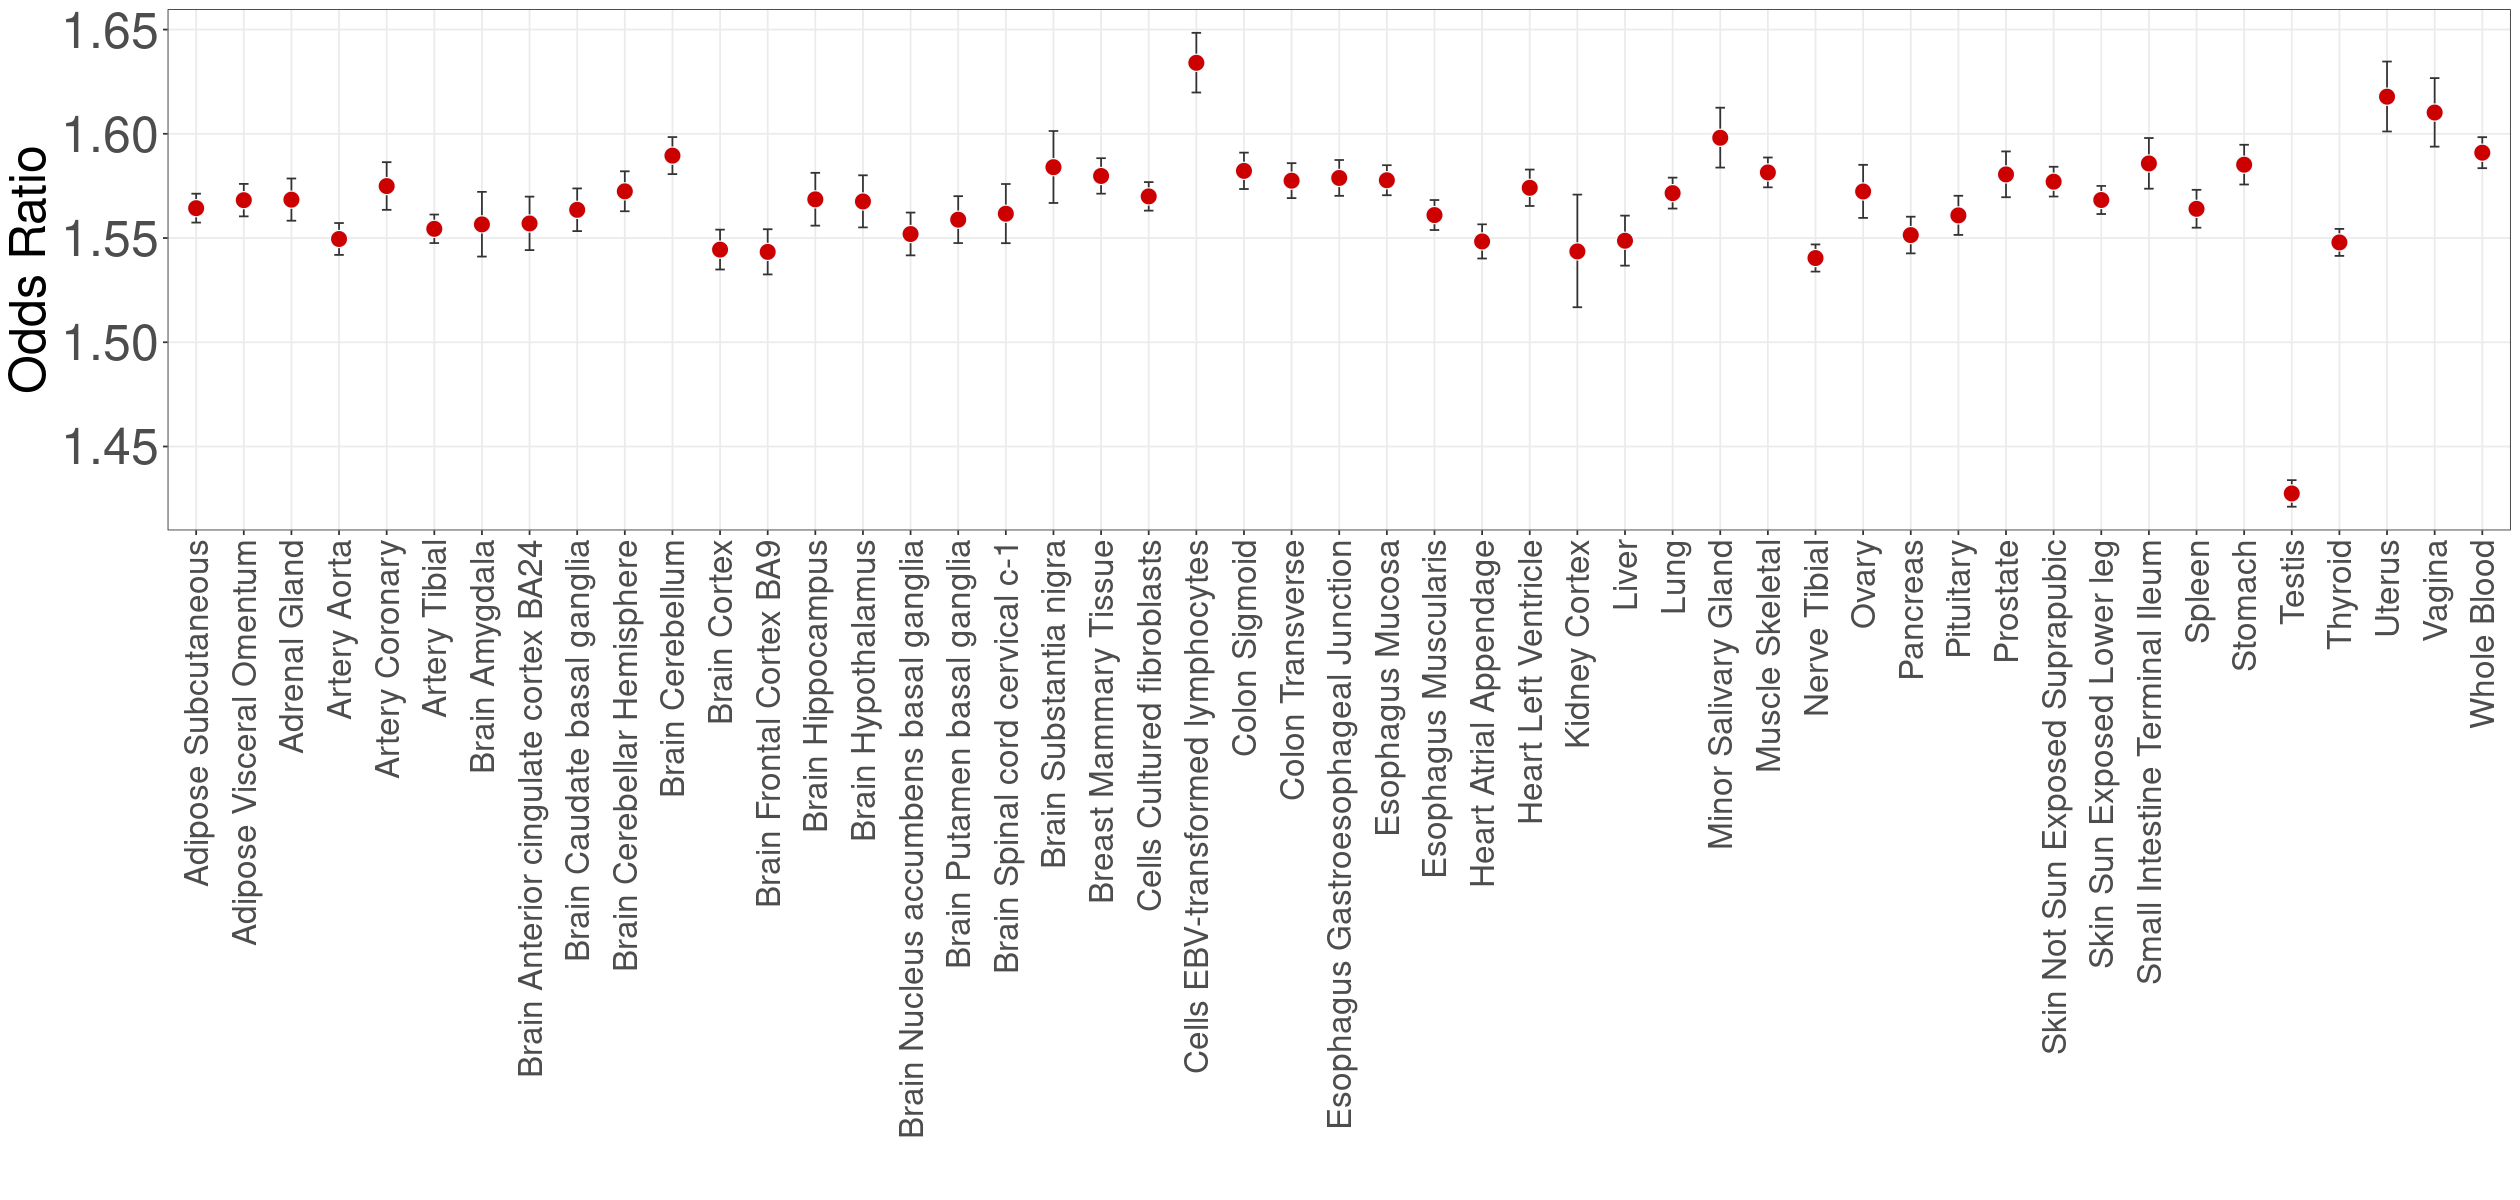

In [27]:
options(repr.plot.width=21, repr.plot.height=10)
plot_odds_flip <- ggplot(odds_ratio_summary, aes(x = odds_ratio, y = tissue)) + 
    #geom_vline(aes(xintercept = 1), size = .25, linetype = "dashed") + 
    geom_errorbarh(aes(xmax = odds_ratio_upper,
                       xmin = odds_ratio_lower), size = 0.5, height = 
                    0.2, color = "gray20") +
    geom_point(size = 4.5, fill = "red3", shape=21, color='aliceblue') + #gray80
    coord_flip() +
    theme_bw()+
    theme(panel.grid.minor = element_blank()) +
    ylab("") +
    xlab("Odds Ratio") +
    theme(plot.title = element_text(hjust = 0.5),
          title = element_text(size = 30), 
          axis.title = element_text(size = 30), 
          axis.text.x = element_text(size = 20, 
                                     angle = 90, 
                                     vjust = 0.5, 
                                     hjust = 1),
          axis.text.y = element_text(size = 30),
          legend.title = element_text(size = 28)) 

plot_odds_flip

In [28]:
ggsave(plot_odds_flip, width = 21, height = 10,
       filename = "/Users/rusi2317/projects/DBNascent_Analysis/figures/hg38_bidir_gtex_odds_ratio.pdf", 
       bg = "transparent")

ggsave(plot_odds_flip, width = 21, height = 10,
       filename = "/Users/rusi2317/projects/DBNascent_Analysis/figures/hg38_bidir_gtex_odds_ratio.png", 
       bg = "transparent")